<a href="https://colab.research.google.com/github/ATIK2110018/ML_projects/blob/main/feni_flood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/flood.csv')

In [38]:
df.head(5)

,CID,elevation,precipitation,lulc,flow_dir,flow_accu,slope,twi,ndvi,permeability,river_dist,drainage_den,flood,POINT_X,POINT_Y
0,0,11.0,240.236206,2.0,64.0,11.0,0.783849,6.689596,0.505045,383.000000,150.000000,2497.944580,0.0,325535.3919,2535189.681
1,0,8.0,164.872559,1.0,2.0,8.0,2.043290,5.412681,0.587101,375.700151,429.534637,1352.190064,0.0,336199.0354,2543559.565
2,0,12.0,164.872559,3.0,32.0,0.0,0.000000,NaN,0.530950,375.000000,1360.624878,0.000000,0.0,340075.1435,2539204.174
3,0,9.0,176.745911,3.0,1.0,2.0,0.000000,NaN,0.614392,372.500000,108.166542,1848.662109,1.0,339234.7319,2531377.641
4,0,6.0,207.581909,3.0,8.0,3.0,1.051592,5.096419,-0.063456,368.000000,NaN,NaN,0.0,337305.5332,2517264.532


In [39]:
df.shape

(5000, 15)

In [40]:
df.isnull().sum()

,0
CID,0
elevation,1
precipitation,8
lulc,14
flow_dir,1
flow_accu,1
slope,29
twi,2971
ndvi,3
permeability,0


In [41]:
df['twi']=df['twi'].fillna(0)
df['river_dist']=df['river_dist'].fillna(df['river_dist'].mean)
df['elevation']=df['elevation'].fillna(df['elevation'].mean)
df['precipitation']=df['precipitation'].fillna(df['precipitation'].mean)
df['lulc']=df['lulc'].fillna(1)
df['flow_dir']=df['flow_dir'].fillna(2)
df['slope']=df['slope'].fillna(df['slope'].mean)
df['flow_accu']=df['flow_accu'].fillna(df['flow_accu'].mean)
df['ndvi']=df['ndvi'].fillna(df['ndvi'].mean)
df['drainage_den']=df['drainage_den'].fillna(df['drainage_den'].mean)
df['flood']=df['flood'].fillna(0)

In [42]:
df.isnull().sum()

,0
CID,0
elevation,0
precipitation,0
lulc,0
flow_dir,0
flow_accu,0
slope,0
twi,0
ndvi,0
permeability,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CID            5000 non-null   int64  
 1   elevation      5000 non-null   object 
 2   precipitation  5000 non-null   object 
 3   lulc           5000 non-null   float64
 4   flow_dir       5000 non-null   float64
 5   flow_accu      5000 non-null   object 
 6   slope          5000 non-null   object 
 7   twi            5000 non-null   float64
 8   ndvi           5000 non-null   object 
 9   permeability   5000 non-null   float64
 10  river_dist     5000 non-null   object 
 11  drainage_den   5000 non-null   object 
 12  flood          5000 non-null   float64
 13  POINT_X        5000 non-null   float64
 14  POINT_Y        5000 non-null   float64
dtypes: float64(7), int64(1), object(7)
memory usage: 586.1+ KB


In [44]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

for col in non_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in df.columns:
    df[col] = df[col].fillna(df[col].mean())

print(df.dtypes)

Index(['elevation', 'precipitation', 'flow_accu', 'slope', 'ndvi',
       'river_dist', 'drainage_den'],
      dtype='object')
CID                int64
elevation        float64
precipitation    float64
lulc             float64
flow_dir         float64
flow_accu        float64
slope            float64
twi              float64
ndvi             float64
permeability     float64
river_dist       float64
drainage_den     float64
flood            float64
POINT_X          float64
POINT_Y          float64
dtype: object


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CID            5000 non-null   int64  
 1   elevation      5000 non-null   float64
 2   precipitation  5000 non-null   float64
 3   lulc           5000 non-null   float64
 4   flow_dir       5000 non-null   float64
 5   flow_accu      5000 non-null   float64
 6   slope          5000 non-null   float64
 7   twi            5000 non-null   float64
 8   ndvi           5000 non-null   float64
 9   permeability   5000 non-null   float64
 10  river_dist     5000 non-null   float64
 11  drainage_den   5000 non-null   float64
 12  flood          5000 non-null   float64
 13  POINT_X        5000 non-null   float64
 14  POINT_Y        5000 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 586.1 KB


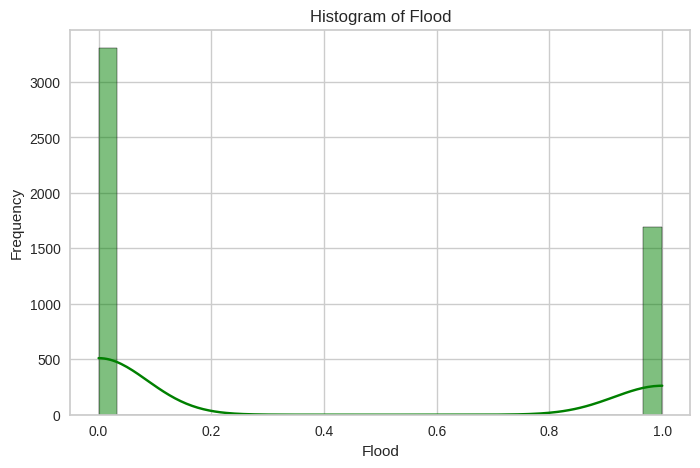

In [46]:
plt.figure(figsize=(8, 5))
sns.histplot(df['flood'], bins=30, kde=True, color='green')
plt.xlabel("Flood")
plt.ylabel("Frequency")
plt.title("Histogram of Flood")
plt.show()

In [47]:
df.isnull().sum()


,0
CID,0
elevation,0
precipitation,0
lulc,0
flow_dir,0
flow_accu,0
slope,0
twi,0
ndvi,0
permeability,0


In [48]:
df.describe()

,CID,elevation,precipitation,lulc,flow_dir,flow_accu,slope,twi,ndvi,permeability,river_dist,drainage_den,flood,POINT_X,POINT_Y
count,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,0.0,10.366473,189.007070,1.781000,26.733800,264.751550,1.200125,2.379455,0.500832,375.710147,561.731125,2092.535893,0.338800,337599.046209,2.544141e+06
std,0.0,2.966392,21.339960,0.726873,34.304366,4588.514548,1.098561,3.236711,0.148091,3.627717,417.064616,1675.387725,0.473349,7367.431529,1.222032e+04
min,0.0,0.000000,144.887833,1.000000,1.000000,0.000000,0.000000,0.000000,-0.354639,361.500000,0.000000,0.000000,0.000000,320533.912200,2.516684e+06
25%,0.0,9.000000,172.734528,1.000000,4.000000,0.000000,0.350566,0.000000,0.431217,373.500000,234.307495,861.806229,0.000000,332211.322075,2.535916e+06
50%,0.0,10.000000,187.451721,2.000000,16.000000,1.000000,1.051592,0.000000,0.523936,375.000000,477.170822,1905.707520,0.000000,338223.013400,2.543187e+06
75%,0.0,12.000000,204.776962,2.000000,32.000000,8.000000,1.887195,4.749846,0.605698,378.000000,818.840637,2859.930054,1.000000,343083.895300,2.551443e+06
max,0.0,36.000000,246.633606,3.000000,128.000000,252770.000000,15.011990,17.190081,0.782543,389.500000,2510.338623,11514.011720,1.000000,354457.126600,2.574361e+06


In [49]:
df=df.drop(columns=['CID','POINT_X','POINT_Y','flow_accu','twi'],axis=1)

In [50]:
df.head(8)

,elevation,precipitation,lulc,flow_dir,slope,ndvi,permeability,river_dist,drainage_den,flood
0,11.0,240.236206,2.0,64.0,0.783849,0.505045,383.000000,150.000000,2497.944580,0.0
1,8.0,164.872559,1.0,2.0,2.043290,0.587101,375.700151,429.534637,1352.190064,0.0
2,12.0,164.872559,3.0,32.0,0.000000,0.530950,375.000000,1360.624878,0.000000,0.0
3,9.0,176.745911,3.0,1.0,0.000000,0.614392,372.500000,108.166542,1848.662109,1.0
4,6.0,207.581909,3.0,8.0,1.051592,-0.063456,368.000000,561.731125,2092.535893,0.0
5,9.0,205.867493,2.0,4.0,2.131450,0.656126,375.500000,902.496521,1313.390991,0.0
6,12.0,188.070252,2.0,1.0,0.350566,0.730617,377.000000,300.000000,2655.808106,1.0
7,14.0,175.080338,2.0,4.0,1.567406,0.653409,373.000000,480.000000,4259.781738,0.0


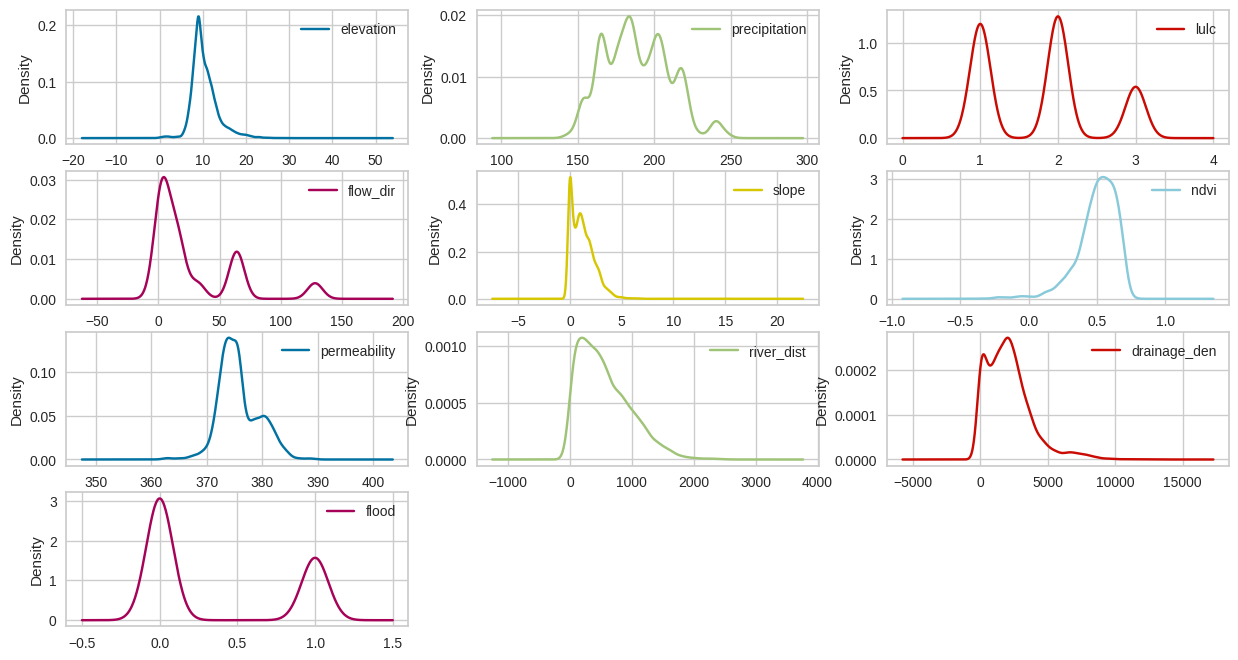

In [51]:
df.plot(kind='density',figsize=(15,8),subplots=True,layout=(4,3),sharex=False)
plt.show()

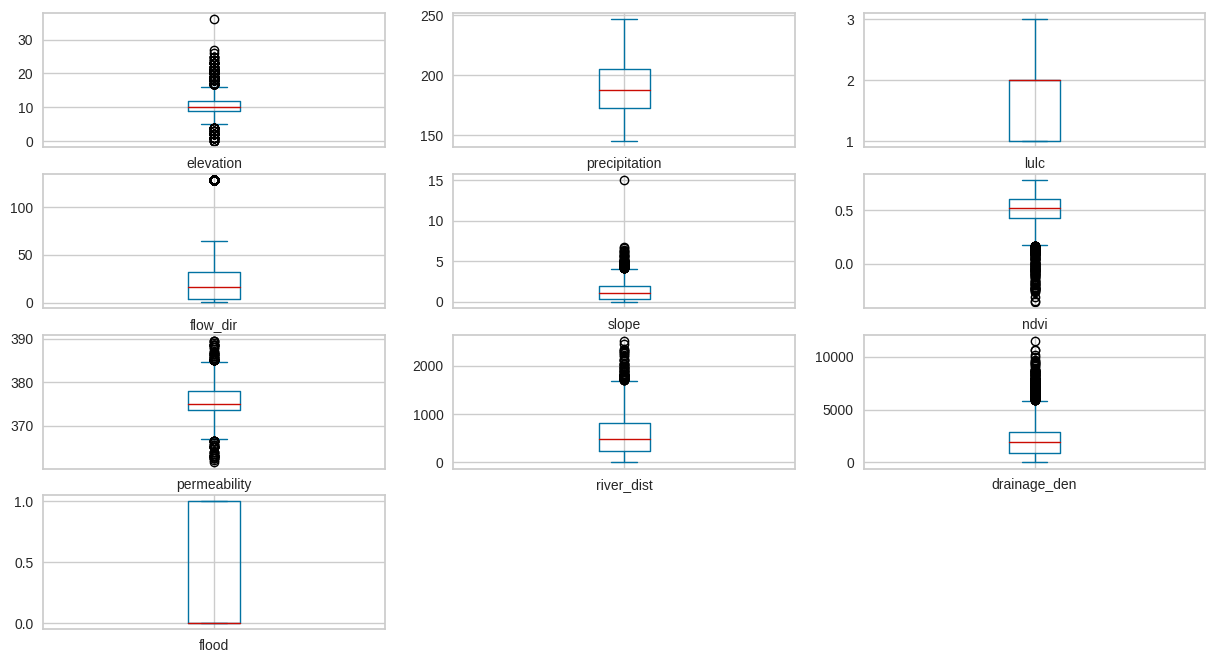

In [52]:
df.plot(kind='box',figsize=(15,8),subplots=True,layout=(4,3),sharex=False)
plt.show()

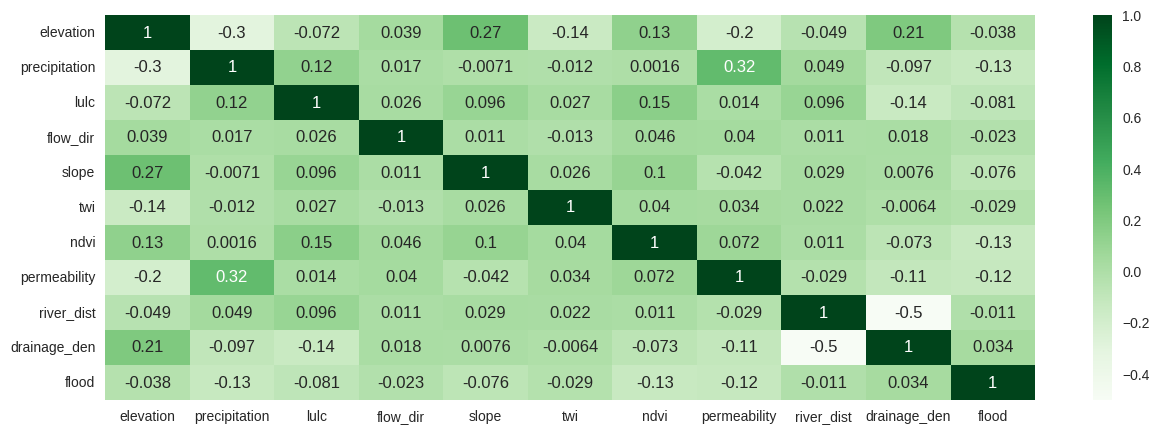

In [30]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

In [31]:
!pip install pycaret

In [32]:
from pycaret.classification import *

In [53]:
setup(df,target='flood',session_id = 123)

,Description,Value
0,Session id,123
1,Target,flood
2,Target type,Binary
3,Original data shape,"(5000, 10)"
4,Transformed data shape,"(5000, 10)"
5,Transformed train set shape,"(3500, 10)"
6,Transformed test set shape,"(1500, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [54]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6977,0.6693,0.2664,0.6300,0.3731,0.2152,0.2504,0.5340
rf,Random Forest Classifier,0.6971,0.6645,0.3035,0.6085,0.4040,0.2304,0.2560,0.6670
lightgbm,Light Gradient Boosting Machine,0.6889,0.6549,0.3491,0.5719,0.4315,0.2343,0.2490,0.3480
et,Extra Trees Classifier,0.6829,0.6592,0.2849,0.5674,0.3783,0.1954,0.2171,0.5460
ada,Ada Boost Classifier,0.6783,0.6383,0.2437,0.5550,0.3373,0.1671,0.1916,0.3660
xgboost,Extreme Gradient Boosting,0.6760,0.6409,0.3820,0.5311,0.4434,0.2238,0.2302,0.2490
qda,Quadratic Discriminant Analysis,0.6623,0.6287,0.2167,0.5090,0.3023,0.1248,0.1456,0.0340
dummy,Dummy Classifier,0.6611,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0260
lda,Linear Discriminant Analysis,0.6606,0.6336,0.0935,0.4923,0.1557,0.0554,0.0848,0.0290
lr,Logistic Regression,0.6591,0.6156,0.0666,0.4872,0.1165,0.0372,0.0671,0.4080


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [55]:
tuned_model = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.6586,0.1681,0.7692,0.2759,0.1753,0.2567
1,0.6914,0.6695,0.1513,0.7200,0.2500,0.1496,0.2225
2,0.6771,0.6898,0.0840,0.7143,0.1504,0.0849,0.1613
3,0.6971,0.6800,0.1345,0.8421,0.2319,0.1525,0.2539
4,0.6857,0.6808,0.1429,0.6800,0.2361,0.1339,0.1991
5,0.6829,0.6567,0.1429,0.6538,0.2345,0.1282,0.1877
6,0.6686,0.6211,0.1356,0.5333,0.2162,0.0921,0.1271
7,0.6657,0.6658,0.0763,0.5294,0.1333,0.0529,0.0919
8,0.6914,0.6982,0.1780,0.6562,0.2800,0.1590,0.2141


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [36]:
print(best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
